## drawing a figure

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/mojones/binders/master/olympics.csv", sep="\t")
data

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary,HUN
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,Austria,AUT
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,Greece,GRE
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,Greece,GRE
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,Greece,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver,Germany,GER
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze,Lithuania,LTU
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze,Armenia,ARM
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold,Cuba,CUB


### drawing figure with pandas  ( data.plot(kind= '....', figsize=('',''))  )

<AxesSubplot:>

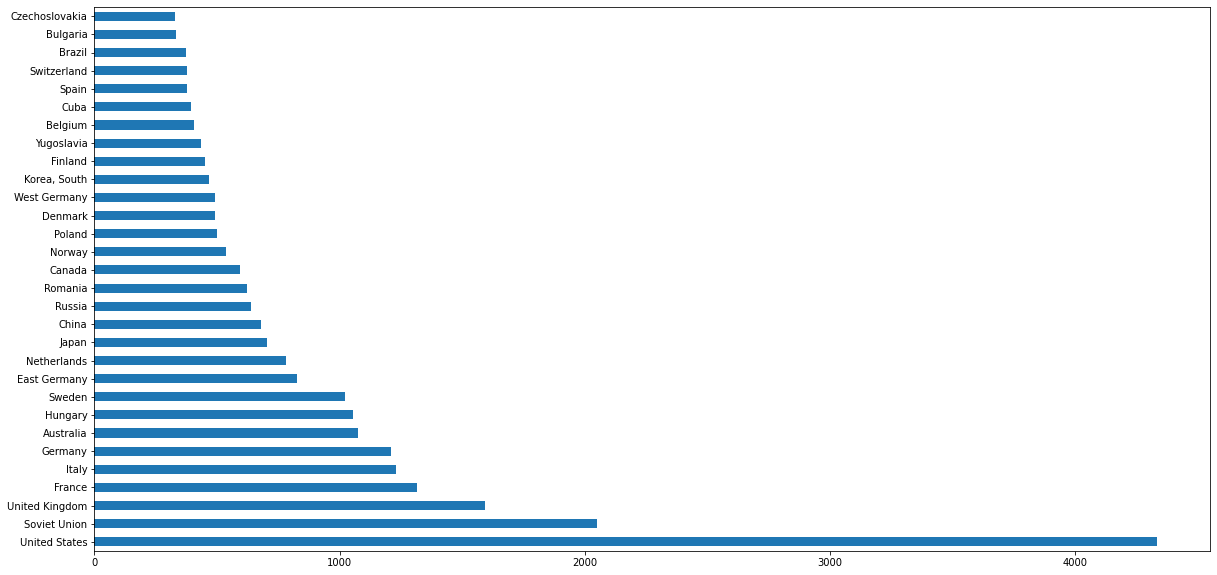

In [3]:
data['Country'].value_counts().head(30).plot(kind = 'barh', figsize = (20,10))

### drawing figure with matplotlib  ( plt.figure()  ;  plt.plot()  )

In [6]:
data['Year'].value_counts().sort_index()

1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
Name: Year, dtype: int64

Text(0.5, 1.0, 'Year-madals')

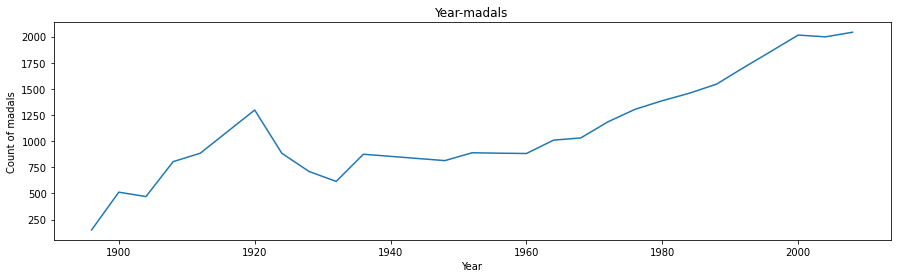

In [7]:
plt.figure(figsize=(15,4))

plt.plot(data['Year'].value_counts().sort_index())

plt.xlabel('Year')
plt.ylabel('Count of madals')
plt.title('Year-madals')


### drawing figure with seaborn  (we use matplotlib for figure)

### ( plt.figure(figsize=('','')) ; sns.boxplot( data=...., x=..., y=...) )

In [9]:
data.head()

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary,HUN
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,Austria,AUT
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,Greece,GRE
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,Greece,GRE
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,Greece,GRE


In [40]:
df1 = data[['Country', 'Year']]
df1

,Country,Year
0,Hungary,1896
1,Austria,1896
2,Greece,1896
3,Greece,1896
4,Greece,1896
...,...,...
29211,Germany,2008
29212,Lithuania,2008
29213,Armenia,2008
29214,Cuba,2008


In [45]:
df1['madal_count'] = df1.index.value_counts()
df1

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Year,madal_count
0,Hungary,1896,1
1,Austria,1896,1
2,Greece,1896,1
3,Greece,1896,1
4,Greece,1896,1
...,...,...,...
29211,Germany,2008,1
29212,Lithuania,2008,1
29213,Armenia,2008,1
29214,Cuba,2008,1


In [46]:
summary = df1.groupby(['Country', 'Year']).sum()
summary

madal_count
Country     Year             
Afghanistan 2008            1
Algeria     1984            2
            1992            2
            1996            3
            2000            5
...                       ...
Zambia      1984            1
            1996            1
Zimbabwe    1980           16
            2004            3
            2008            4

[1072 rows x 1 columns]

In [30]:
summary_plus500 = summary[.values > 500]
df_high

United States     4335
Soviet Union      2049
United Kingdom    1594
France            1314
Italy             1228
Germany           1211
Australia         1075
Hungary           1053
Sweden            1021
East Germany       825
Netherlands        782
Japan              704
China              679
Russia             638
Romania            624
Canada             592
Norway             537
Name: Country, dtype: int64

In [60]:
plus_500 = data.groupby('Country').filter(lambda x : len(x) > 500)
plus_500

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,Country,Int Olympic Committee code
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,Hungary,HUN
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold,Hungary,HUN
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze,United States,USA
12,Athens,1896,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100m,M,Bronze,Hungary,HUN
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold,United States,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
29207,Beijing,2008,Wrestling,Wrestling Gre-R,"FODOR, Zoltan",HUN,Men,74 - 84kg,M,Silver,Hungary,HUN
29209,Beijing,2008,Wrestling,Wrestling Gre-R,"WHEELER, Adam",USA,Men,84 - 96kg,M,Bronze,United States,USA
29210,Beijing,2008,Wrestling,Wrestling Gre-R,"KHUSHTOV, Aslanbek",RUS,Men,84 - 96kg,M,Gold,Russia,RUS
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver,Germany,GER


In [75]:
plus_500.groupby(['Country', 'Year']).size()

Country        Year
Australia      1896      2
               1900      5
               1920      6
               1924     10
               1928      4
                      ... 
United States  1992    224
               1996    260
               2000    248
               2004    264
               2008    315
Length: 314, dtype: int64

In [72]:
summary = plus_500.groupby(['Country', 'Year']).size().to_frame('medal_count')
summary

medal_count
Country       Year             
Australia     1896            2
              1900            5
              1920            6
              1924           10
              1928            4
...                         ...
United States 1992          224
              1996          260
              2000          248
              2004          264
              2008          315

[314 rows x 1 columns]

In [78]:
summary.reset_index(inplace=True)

In [79]:
summary

,Country,Year,medal_count
0,Australia,1896,2
1,Australia,1900,5
2,Australia,1920,6
3,Australia,1924,10
4,Australia,1928,4
...,...,...,...
309,United States,1992,224
310,United States,1996,260
311,United States,2000,248
312,United States,2004,264


In [ ]:
# alternatif kod:

summary2 = (
    data
    .groupby('Country')
    .filter(lambda x : len(x) > 500)
    .groupby(['Country', 'Year'])
    .size()
    .to_frame('medal count')
    .reset_index()
)

In [80]:
import seaborn as sns

<AxesSubplot:xlabel='Country', ylabel='medal_count'>

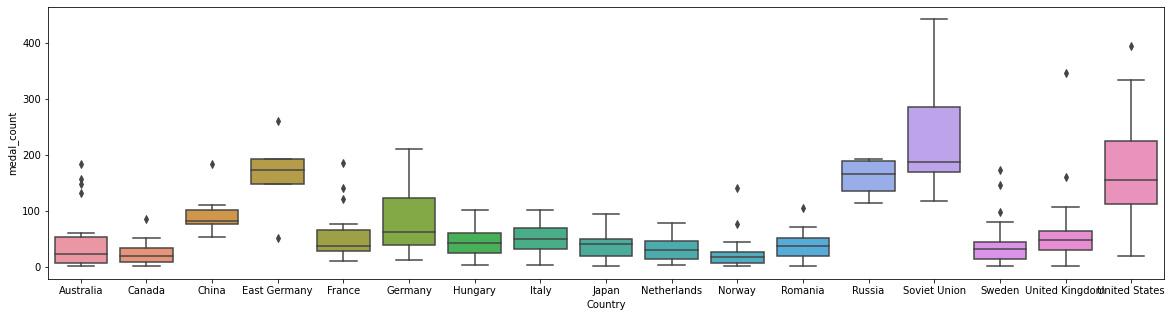

In [82]:
plt.figure(figsize = (20,5))

sns.boxplot(data=summary, x='Country', y='medal_count')



In [87]:
summary_by_medal = (
    data
    .groupby('Country')
    .filter(lambda x : len(x) > 500)
    .groupby(['Country', 'Year', 'Medal'])
    .size()
    .to_frame('medal_count')
    .reset_index()
)

summary_by_medal

,Country,Year,Medal,medal_count
0,Australia,1896,Gold,2
1,Australia,1900,Bronze,3
2,Australia,1900,Gold,2
3,Australia,1920,Bronze,1
4,Australia,1920,Silver,5
...,...,...,...,...
881,United States,2004,Gold,116
882,United States,2004,Silver,75
883,United States,2008,Bronze,81
884,United States,2008,Gold,125


<Figure size 1440x360 with 0 Axes>

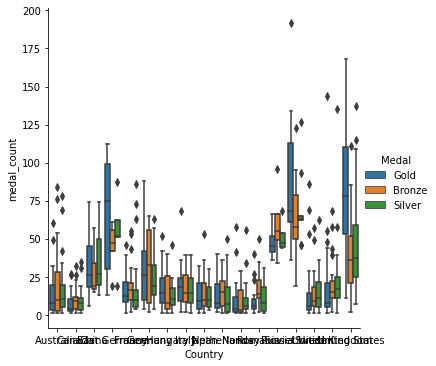

In [88]:
plt.figure(figsize = (20,5))

sns.catplot(data=summary_by_medal, x='Country', y='medal_count', hue = 'Medal', kind='box')

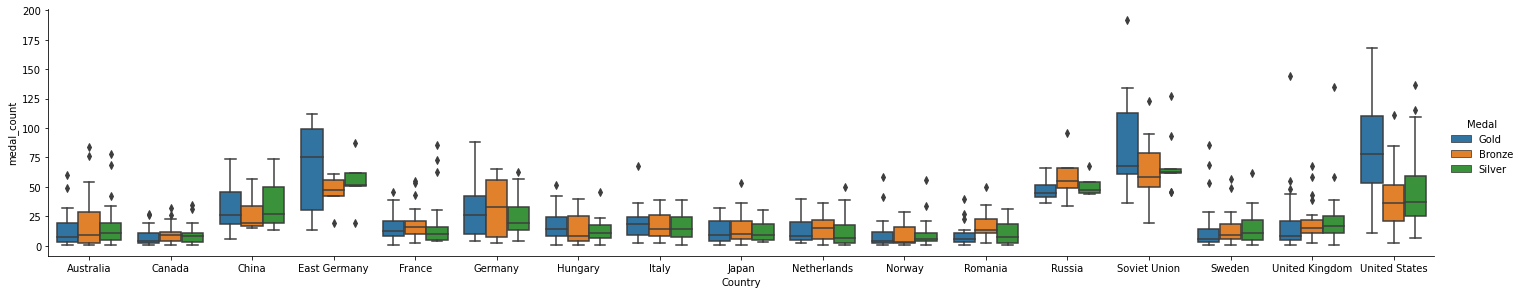

In [94]:
sns.catplot(
    data=summary_by_medal,
    x='Country',
    y='medal_count',
    hue='Medal',
    kind='box',
    height=4, # make the plot 5 units high
    aspect=5) # height should be three times width

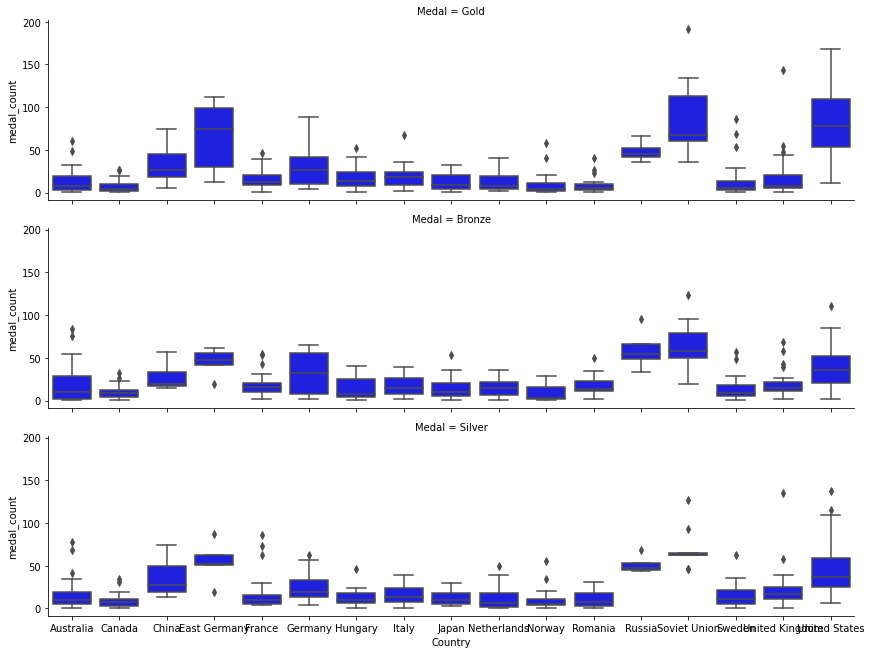

In [95]:
# using "row" attribute

sns.catplot(
    data=summary_by_medal,
    x='Country',
    y='medal_count',
    row='Medal',
    kind='box',
    height=3, 
    aspect=4,
    color='blue') 

## printing a figure

In [96]:
plt.savefig('medals.svg')

<Figure size 432x288 with 0 Axes>